In [2]:
import sys
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib

load_dotenv()
sys.path.append(os.getenv("ROOT"))
pd.set_option("display.max_columns", None)


In [3]:
from connector.cassandra_connector import get_session, create_and_set_keyspace, get_dataframe
session = get_session()
create_and_set_keyspace(session)

In [4]:
df = get_dataframe(session)

<Axes: >

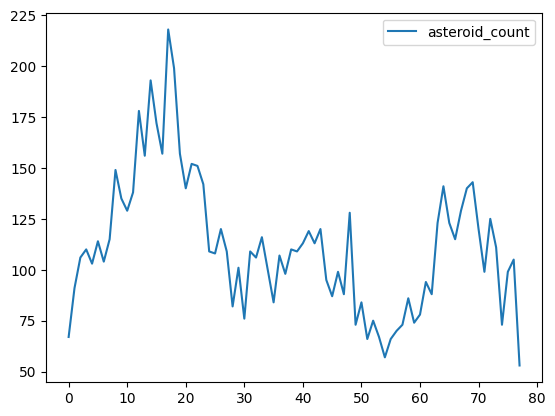

In [9]:
df.groupby(df['date_system_recorded'].dt.to_period("W")).size().reset_index(name='asteroid_count').plot()

In [10]:
df

,id,absolute_magnitude_h,close_approach_date,close_approach_date_full,date_system_recorded,epoch_date_close_approach,estimated_diameter_max,estimated_diameter_min,is_potentially_hazardous_asteroid,is_sentry_object,links,miss_distance_astronomical,miss_distance_lunar,miss_distance_meters,name,nasa_jpl_url,neo_reference_id,orbiting_body,relative_velocity
0,3370021,22.25,2023-01-22,2023-Jan-22 05:42,2023-01-21 18:15:00,1674366120000,210.882227,94.309399,False,False,http://api.nasa.gov/neo/rest/v1/neo/3370021?ap...,0.316321498,123.049062722,4.732102e+10,(2007 EC),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,3370021,Earth,15642.616468
1,2510238,20.75,2023-10-19,2023-Oct-19 13:44,2023-10-18 18:15:00,1697723040000,420.765360,188.171989,False,False,http://api.nasa.gov/neo/rest/v1/neo/2510238?ap...,0.3684191591,143.3150528899,5.511472e+10,510238 (2011 FC29),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,2510238,Earth,15783.404812
2,54215203,27.85,2022-11-06,2022-Nov-06 22:22,2022-11-05 18:15:00,1667773320000,15.997053,7.154100,False,False,http://api.nasa.gov/neo/rest/v1/neo/54215203?a...,0.069315925,26.963894825,1.036951e+10,(2021 VF),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,54215203,Earth,6343.213493
3,54330721,24.45,2022-12-27,2022-Dec-27 14:25,2022-12-26 18:15:00,1672151100000,76.566709,34.241673,False,False,http://api.nasa.gov/neo/rest/v1/neo/54330721?a...,0.0167479429,6.5149497881,2.505457e+09,(2022 WV9),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,54330721,Earth,7250.216807
4,54356035,25.22,2023-05-01,2023-May-01 22:39,2023-04-30 18:15:00,1682980740000,53.708123,24.019003,False,False,http://api.nasa.gov/neo/rest/v1/neo/54356035?a...,0.0427131659,16.6154215351,6.389799e+09,(2023 HY3),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,54356035,Earth,6545.996465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,54245816,26.02,2022-08-04,2022-Aug-04 01:18,2022-08-03 18:15:00,1659575880000,37.156943,16.617090,False,False,http://api.nasa.gov/neo/rest/v1/neo/54245816?a...,0.130007532,50.572929948,1.944885e+10,(2022 CM3),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,54245816,Earth,8321.384490
8728,2592968,21.68,2023-05-09,2023-May-09 04:13,2023-05-08 18:15:00,1683605580000,274.182656,122.618211,False,False,http://api.nasa.gov/neo/rest/v1/neo/2592968?ap...,0.0863266831,33.5810797259,1.291429e+10,592968 (2015 FV118),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,2592968,Earth,17995.288841
8729,3253644,20.55,2022-09-27,2022-Sep-27 10:17,2022-09-26 18:15:00,1664273820000,461.360043,206.326484,False,False,http://api.nasa.gov/neo/rest/v1/neo/3253644?ap...,0.3636839868,141.4730708652,5.440635e+10,(2004 SB1),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,3253644,Earth,25478.831782
8730,54088800,22.79,2022-10-19,2022-Oct-19 22:08,2022-10-18 18:15:00,1666217280000,164.452310,73.545309,False,False,http://api.nasa.gov/neo/rest/v1/neo/54088800?a...,0.3678590548,143.0971723172,5.503093e+10,(2020 VM6),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,54088800,Earth,10468.535624
